<a href="https://colab.research.google.com/github/FereshtehRD/DataScience2/blob/FereshtehRD-homework1/Project_data_science_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras.backend as K
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import RepeatedKFold,cross_val_predict
from tensorflow.keras.models import*
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from scipy.stats import zscore
import os
from sklearn import metrics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import stochastic_gradient
import keras.backend as K
import keras.backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as n
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import*
from keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
#build the perceptron 
df=pd.read_csv('/diabetes.csv')
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='normal',activation='sigmoid'))
#model.add(Dense(1, kernel_initializer='normal'))
adamm = keras.optimizers.Adam(lr=0.19)
model.compile(loss='mse', optimizer=adamm)

# New Section

In [ ]:
#create r_squared model
import keras.backend as K
import numpy as np

def r2_squared(y_true, y_pred):
  ybar=np.mean(y_true)
  sse=0
  sst=0
  #we changed Y to y_true
  for i in range(len(y_true)): 
    sse=sse+((y_true[i]-y_pred[i])**2)
    sst=sst+((y_true[i]-ybar)**2)
    
  r2=(1-(sse/sst))
  return r2
  
    
#def norm(x):
  #return (x - train_stats['mean']) / train_stats['std']

def r2_adjusted(i,r2):

  df=i
  dfr=398-i
  rdf=(df+dfr)/dfr
 
  Rar1=r2 *(-1) 
  Rar2=Rar1.__add__(1) 
  Rrdff=-1*rdf
  Rar3=Rar2*Rrdff 
  Radjustedr2=Rar3.__add__(1) 
  return(Radjustedr2)
  



In [ ]:

#calculate r2 for every individual feature
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
Y = df.iloc[:,0]
scx,scy = StandardScaler(),StandardScaler()
Y=Y.values.reshape(768,1)
scy.fit(Y)
Y_std = scy.transform(Y)
Y_std = preprocessing.scale(Y_std)
R2=[]
Y=Y.ravel()
i=1
while(i<6):
  
  X=df.iloc[:,i]
  X=X.values.reshape(768,1)
  scx.fit(X)
  
  X_std = scx.transform(X)
  X_std = preprocessing.scale(X_std)
  #X_std=X.ravel()
  history =model.fit(X_std, Y_std, batch_size=32, epochs=100, verbose=0)
  yp= model.predict(X_std)
  yp=scy.inverse_transform(yp)
  yp=yp.ravel()
  r2 = r2_squared(Y, yp)
  R2.append(r2)
  i=i+1
R2
R3=np.sort(R2)
#this line sort the array in decending order
R3=R3[::-1]
#this is  way of making dictionary from one array
dictOfWords = { i+1 : R2[i] for i in range(0, len(R2) ) }
# this is way to sort the dictionary on account of values 
import operator
sorted_d = sorted(dictOfWords.items(), key=operator.itemgetter(1),reverse=True)
                                                 
columns=[]
for i in range(len(sorted_d)):
  columns.append(sorted_d[i][0])

#copy columns of dataset in respect to their r2 in new dataset
df_new=df.iloc[:,columns]



ValueError: ignored

# New Section

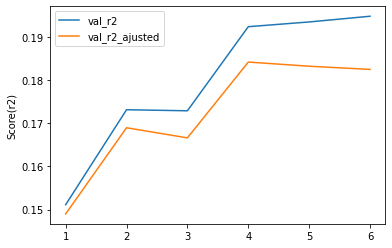

In [ ]:
#forward selection on new dataset which is df-new
Y = df.iloc[:,0]

scx,scy = StandardScaler(),StandardScaler()
Y=Y.values.reshape(768,1)
scy.fit(Y)
Y_std = scy.transform(Y)
Y_std = preprocessing.scale(Y_std)
R2_forward=[]
R2_adjusted=[]

Y=Y.ravel()
i=1
while(i<7):
  model = Sequential()
  model.add(Dense(1, input_dim=i, kernel_initializer='normal',activation='sigmoid'))
  #model.add(Dense(1, kernel_initializer='normal'))
  adamm = keras.optimizers.Adam(lr=0.19)
  model.compile(loss='mse', optimizer=adamm)
  X=df_new.iloc[: ,:i]
  X=X.values.reshape(768, i)
  scx.fit(X)
  X_std = scx.transform(X)
  X_std = preprocessing.scale(X_std)
  #X_std=X.ravel()
  
  history =model.fit(X_std, Y_std, batch_size=32, epochs=100, verbose=0)
  yp= model.predict(X_std)
  yp=scy.inverse_transform(yp)
  yp=yp.ravel()
  r2 = r2_squared(Y, yp)
  R2_forward.append(r2)
  #calculater2adjusted_score
  
  R2_adjusted.append(r2_adjusted(i,r2))
  #this line add for calculate cross validation
  


  
  i=i+1
R2_forward
R2_adjusted
#R2_cv



#so n=5 give us the biggest r2 we can again have code for this part but I did manually. we should have formula becuase by any change this also change.
#we should return the index of biggest number as n*

x = [i+1 for i in range(len(R2_forward))]
plt.plot(x, R2_forward, label='val_r2')
plt.plot(x, R2_adjusted, label='val_r2_ajusted')
#plt.plot(x, R2_cv, label='R2_cv')
plt.ylabel('Score(r2)')
plt.legend()
plt.show()


In [ ]:
print(R2_forward)

n=R2_forward.index(max(R2_forward))
#have an appropriate print for showing n*
print(n)
print(R2_adjusted)
n_adjusted=R2_adjusted.index(max(R2_adjusted))
print(n_adjusted)


[0.15112935594046462, 0.17314231454392137, 0.172899192258689, 0.19239302119745105, 0.1934909066647158, 0.19481541330671337]
5
[0.14899114273124658, 0.16896626562747663, 0.1666174139720461, 0.18419396557509016, 0.18322997672406327, 0.18249115942875482]
3
